# 1. Mengimpor library yang dibutuhkan

In [ ]:
import geopandas as gpd
import matplotlib as mp
import pandas as pd

from shapely.geometry import Point, Polygon
pd.options.display.max_rows = 15

# 2. Menambahkan / membaca data yang dibutuhkan 

In [66]:
stasiun_sepeda = gpd.read_file("velib-disponibilite-en-temps-reel.geojson")
peta_paris = gpd.read_file('quartier_paris.shp')
jalan = gpd.read_file('voie.shp')

# 3. Menampilkan bentuk asli per dokumen

<AxesSubplot:>

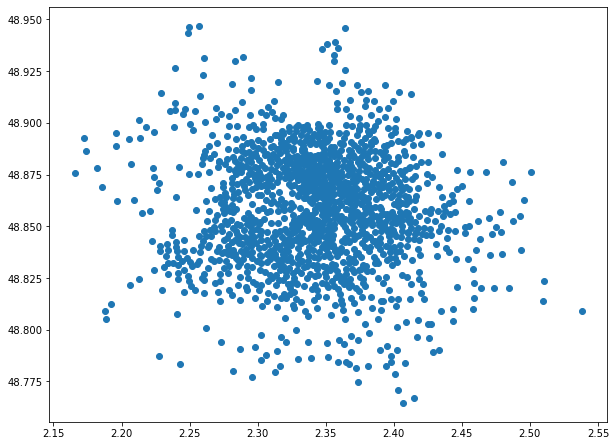

In [67]:
stasiun_sepeda.plot(figsize=(10,10))

<AxesSubplot:>

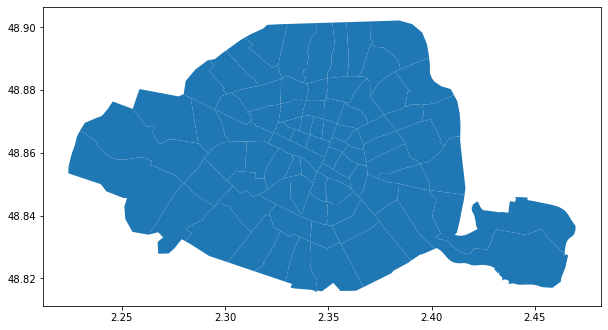

In [68]:
peta_paris.plot(figsize=(10,10))

<AxesSubplot:>

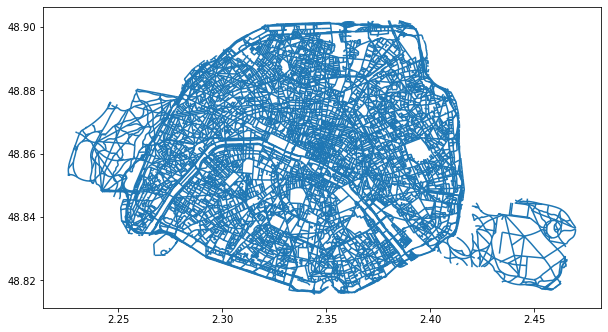

In [69]:
jalan.plot(figsize=(10,10))

# 4. Melakukan Join 2 file menjadi satu

In [70]:
stations = gpd.sjoin(stasiun_sepeda, peta_paris[['l_qu', 'geometry']].copy(), op='within')
stations.head()

,ebike,capacity,name,nom_arrondissement_communes,numbikesavailable,mechanical,stationcode,is_installed,is_renting,numdocksavailable,duedate,is_returning,geometry,index_right,l_qu
0,4,35,Benjamin Godard - Victor Hugo,Paris,7,3,16107,OUI,OUI,28,2021-05-25T09:33:28+07:00,OUI,POINT (2.27572 48.86598),63,Porte-Dauphine
257,4,38,Sablons - Georges Mandel,Paris,10,6,16108,OUI,OUI,28,2021-05-25T09:36:28+07:00,OUI,POINT (2.28189 48.86388),63,Porte-Dauphine
347,5,33,Jardin d'Acclimatation,Paris,13,8,16121,OUI,OUI,19,2021-05-25T09:38:00+07:00,OUI,POINT (2.27077 48.87877),63,Porte-Dauphine
363,2,18,Flandrin - Henri Martin,Paris,5,3,16018,OUI,OUI,13,2021-05-25T09:32:53+07:00,OUI,POINT (2.27242 48.86433),63,Porte-Dauphine
470,1,26,Mahatma Gandhi,Paris,3,2,16123,OUI,OUI,23,2021-05-25T09:32:09+07:00,OUI,POINT (2.26421 48.87636),63,Porte-Dauphine


# 5. Menampilkan data sebaran titik penyewaan sepeda listrik di kota Paris

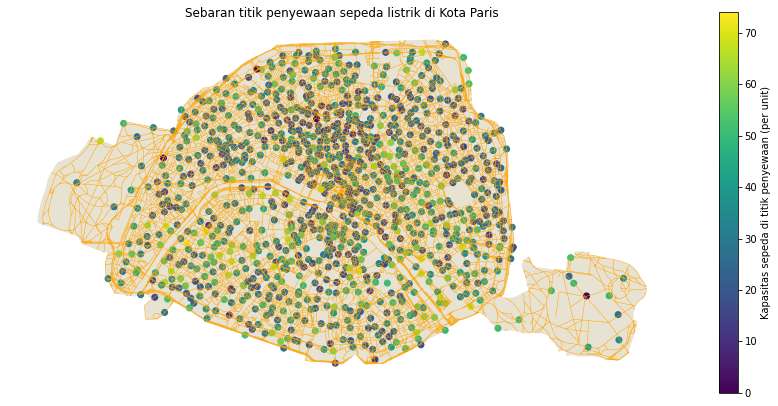

In [113]:
#ax = stations.plot(column='capacity', figsize=(15, 6), legend=True)
#ax.set(title = 'Sebaran titik penyewaan sepeda')
#ax.set_axis_off()

ax = peta_paris.plot(linewidth=0.5, color='#e8e2d3', figsize=(15, 7))
stations.plot(ax = ax, column='capacity', figsize=(15, 6), legend=True, legend_kwds={'label': "Kapasitas sepeda di titik penyewaan (per unit)"})
jalan.plot(ax = ax, figsize=(15, 6), color='orange', linewidth=0.5)

ax.set(title = 'Sebaran titik penyewaan sepeda listrik di Kota Paris');
ax.set_axis_off()
